<a href="https://colab.research.google.com/github/aleksejalex/ske_assignment/blob/main/SKE_AG_protokol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
!pip install reliability

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.5/256.5 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 70.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 70.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.0/89.0 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 34.8 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=00902a57af979ba87eb7a9009a45951c49e08ad53c1229f88bd371832f63eaf4
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
  Created wheel for mplcursors: filename=mplcursors-0.5.2-py3-none-any.whl size=21054 sha256=0a1b9fecd3997e43f8ac12e022610ab2ce9cd9dbc271ca301f21dd4179f73e65
  Stored in directory: /root/.cache/pip/wheels/b5/5b/fb/aed35cc15262c380536820fa3cb2

In [1]:
# importy balicku
import inspect
import numpy as np
import scipy as scp
import pandas as pd
import seaborn as sbn
import csv
import matplotlib as mpt
import statsmodels
import statsmodels.formula.api as sm
from matplotlib import pyplot as plt
import reliability as rel



def retrieve_name(var):
    "vrati nazev promenne jako string"
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is var]

examplevarr = 4
print(examplevarr)
print(retrieve_name(examplevarr))

def gauss(x, mi, sigma2):
    "hustota normalniho rozdeleni. x je bud cislo nebo np.array"
    return (1/(np.sqrt(2*np.pi*sigma2)) * np.exp (-  ( (x-mi)**2 ) / (2*sigma2) ) )

4
['examplevarr']


In [2]:
# additional settings for plotting images:
plt.rcParams.update({"figure.dpi": 130})   # increase DPI, default = 96
#%config InlineBackend.figure_format = "svg"  # every plot (matplotlib's or seaborn's) must be a SVG image

In [3]:
# import datasetu (pomoci Pandas)
# (dataset stazen z >>    )
url = "https://raw.githubusercontent.com/aleksejalex/ske_assignment/main/dataset/Data%20set%20SKE_VeteranClinicTrial_modif-RC_final4_dataset_edited_for_import_to_python.csv?token=GHSAT0AAAAAABY6GWJWO6ADKPS5D4UAOH6KY7YPZGQ"
imported_data = pd.read_csv(url)

imported_data
#data.info

,treat,cell,survt,cens,KAR,didur,age,prith
0,1,1,72,0,60,7,69,0
1,1,1,411,1,70,5,64,10
2,1,1,228,1,60,3,38,0
3,1,1,126,1,60,9,63,10
4,1,1,118,1,70,11,65,10
5,1,1,10,1,20,5,49,0
6,1,1,82,1,40,10,69,10
7,1,1,110,0,80,29,68,0
8,1,1,314,1,50,18,43,0
9,1,1,100,0,70,6,70,0


In [4]:
imported_data.describe()

,treat,cell,survt,cens,KAR,didur,age,prith
count,137,137,137,137,137,137,137,137
mean,1.49635,2.33577,121.628,0.744526,58.5693,8.77372,58.3066,2.91971
std,0.501821,1.06604,157.817,0.437728,20.0396,10.6121,10.5416,4.56337
min,1,1,1,0,10,1,34,0
25%,1,1,25,0,40,3,51,0
50%,1,2,80,1,60,5,62,0
75%,2,3,144,1,75,11,66,10
max,2,4,999,1,99,87,81,10


In [5]:
# moje data: vse, kde cell=2
data = pd.DataFrame()
data = imported_data[imported_data['cell']==2]

data.describe()

,treat,cell,survt,cens,KAR,didur,age,prith
count,48,48,48,48,48,48,48,48
mean,1.375,2,71.6667,0.75,53.5417,9.25,59.875,2.29167
std,0.489246,0,85.7749,0.437595,19.101,13.9093,9.92016,4.24744
min,1,2,2,0,20,1,35,0
25%,1,2,20,0.75,40,2,54.75,0
50%,1,2,51,1,60,4,62.5,0
75%,2,2,97.5,1,70,11,67,0
max,2,2,392,1,85,87,72,10


In [6]:
data[data['cens']==0]

,treat,cell,survt,cens,KAR,didur,age,prith
20,1,2,123,0,40,3,55,0
21,1,2,97,0,60,5,67,0
23,1,2,59,0,30,2,65,0
29,1,2,21,0,40,2,55,10
31,1,2,139,0,80,2,64,0
35,1,2,287,0,60,25,66,10
38,1,2,122,0,80,28,53,0
40,1,2,54,0,70,1,67,0
90,2,2,103,0,70,22,36,10
96,2,2,7,0,20,11,66,0


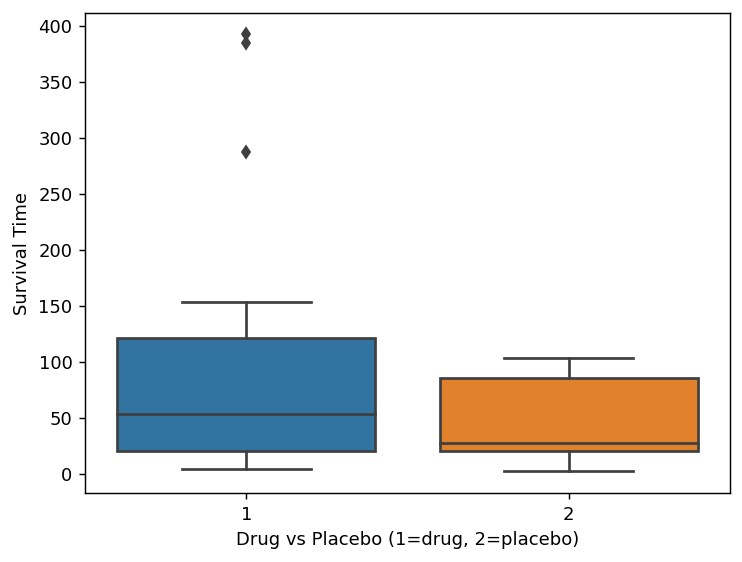

In [7]:
sbn.boxplot(x='treat', y='survt', data=data)
plt.xlabel('Drug vs Placebo (1=drug, 2=placebo)')
plt.ylabel('Survival Time')
plt.suptitle('')
plt.title('')
plt.show()

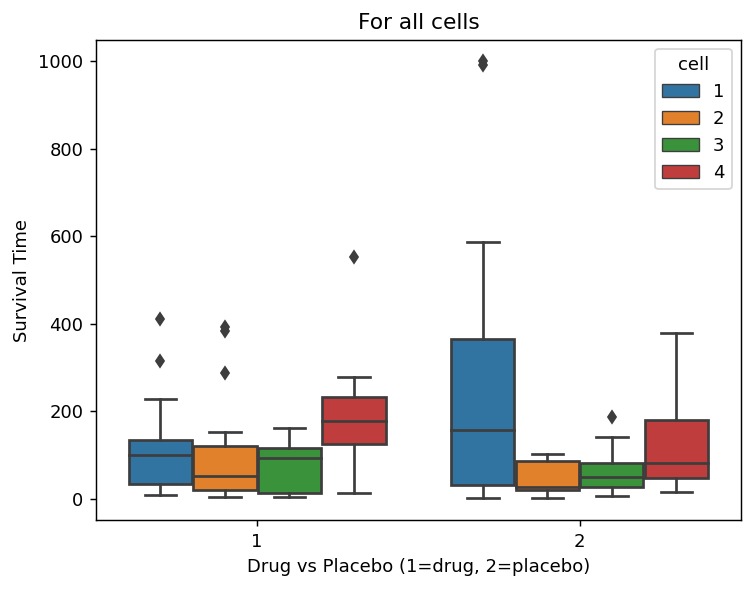

In [8]:
sbn.boxplot(x='treat', y='survt', data=imported_data, hue='cell')
plt.xlabel('Drug vs Placebo (1=drug, 2=placebo)')
plt.ylabel('Survival Time')
plt.suptitle('')
plt.title('For all cells')
plt.show()

In [9]:
data_drug = pd.DataFrame()
data_drug = data[data['treat']==1]
data_placebo = pd.DataFrame()
data_placebo = data[data['treat']==2]

Results from Fit_Everything:
Analysis method: MLE
Failures / Right censored: 22/8 (26.66667% right censored) 

   Distribution   Alpha     Beta   Gamma Alpha 1   Beta 1 Alpha 2  Beta 2 Proportion 1 DS      Mu   Sigma     Lambda  Log-likelihood    AICc     BIC      AD optimizer
       Gamma_3P 270.734 0.498054  3.9999                                                                                    -120.394 247.711 250.991 3.78275       TNC
     Weibull_3P 106.134  0.61087  3.9999                                                                                    -120.934 248.792 252.073 3.65602       TNC
Weibull_Mixture                           56.568  1.09815 389.964 116.374     0.758537                                      -118.037 248.573 253.079 3.59253    powell
 Loglogistic_3P 57.7984 0.775869  3.9999                                                                                    -122.664 252.251 255.532 3.53831       TNC
     Weibull_CR                          128.491 0.744

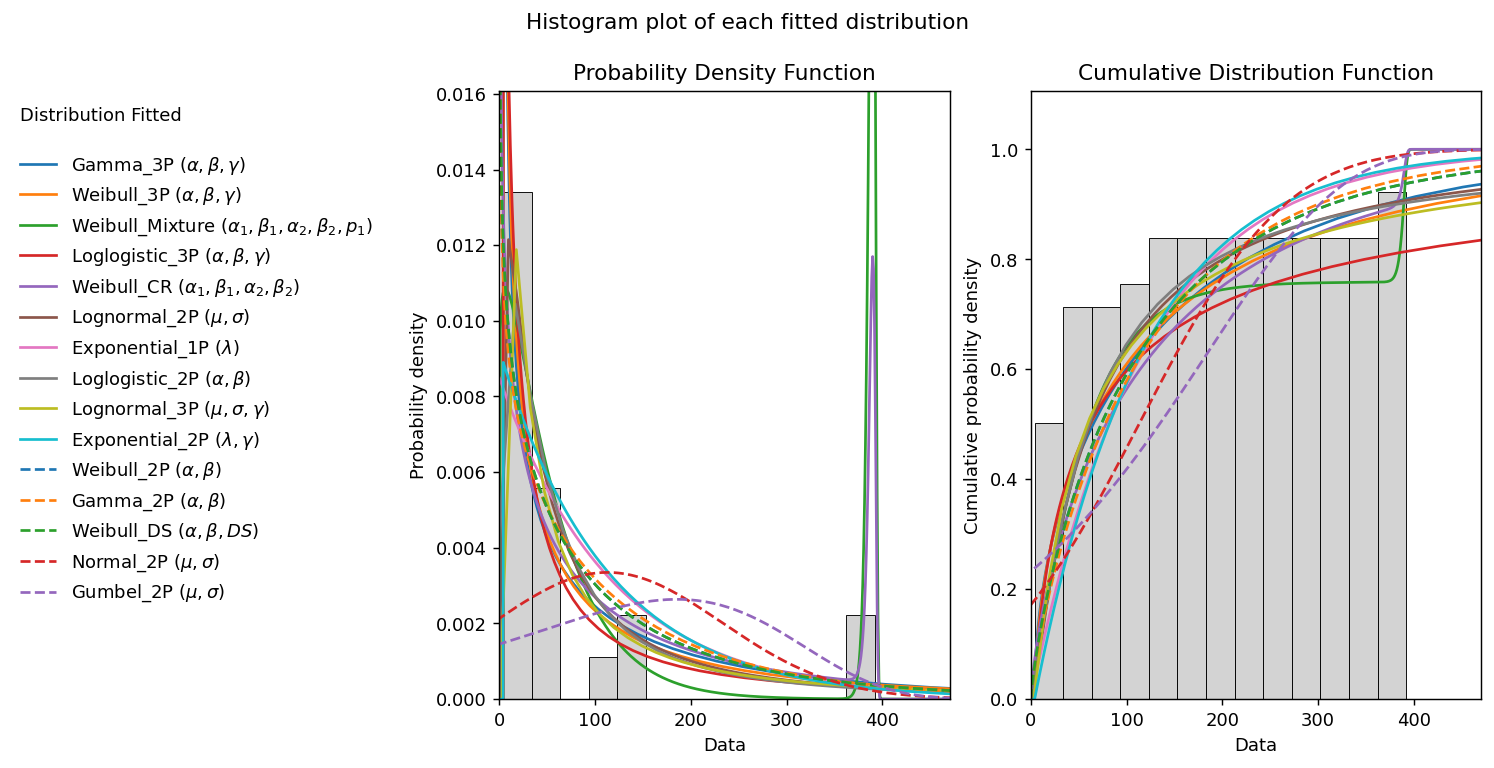

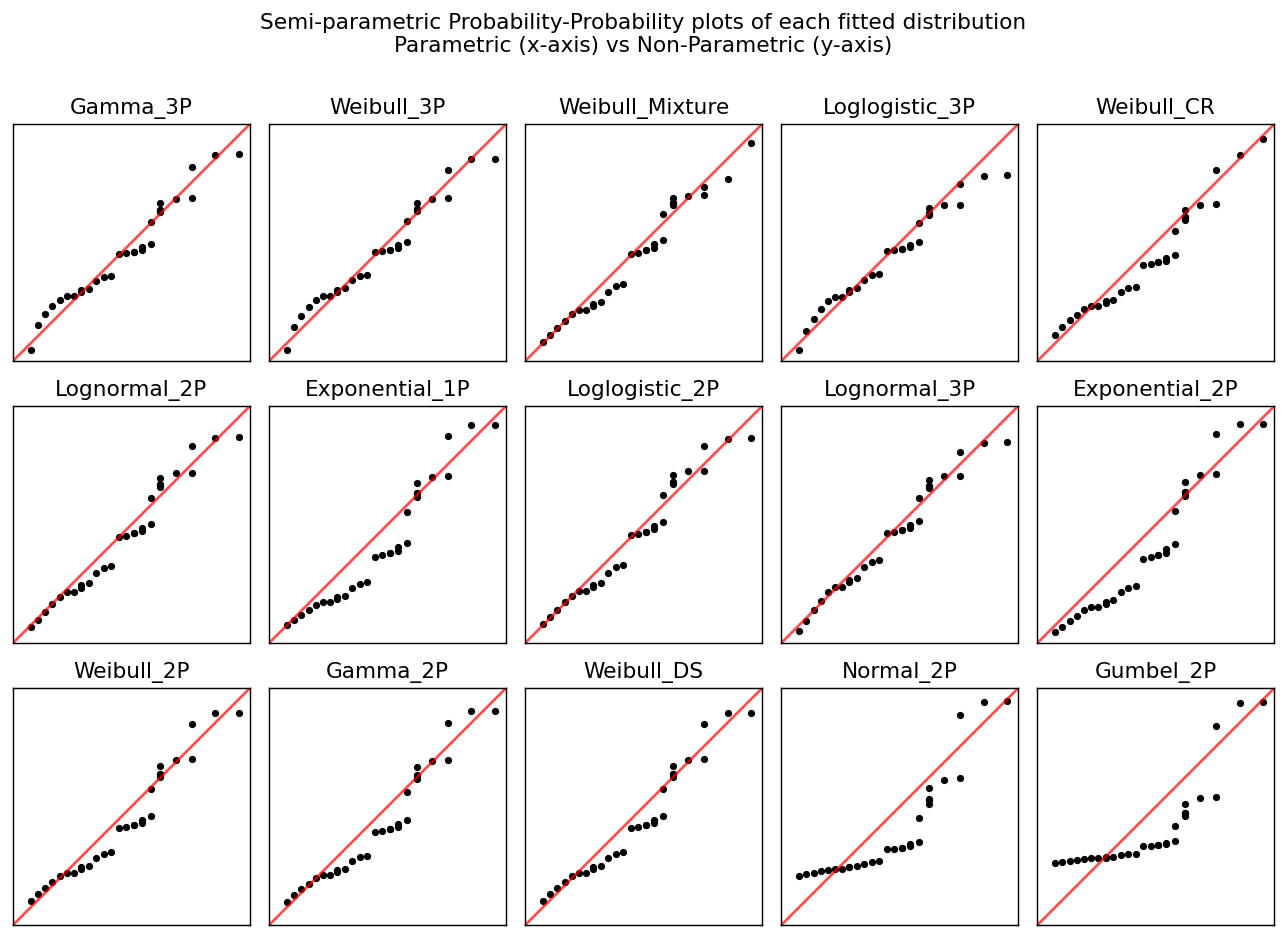

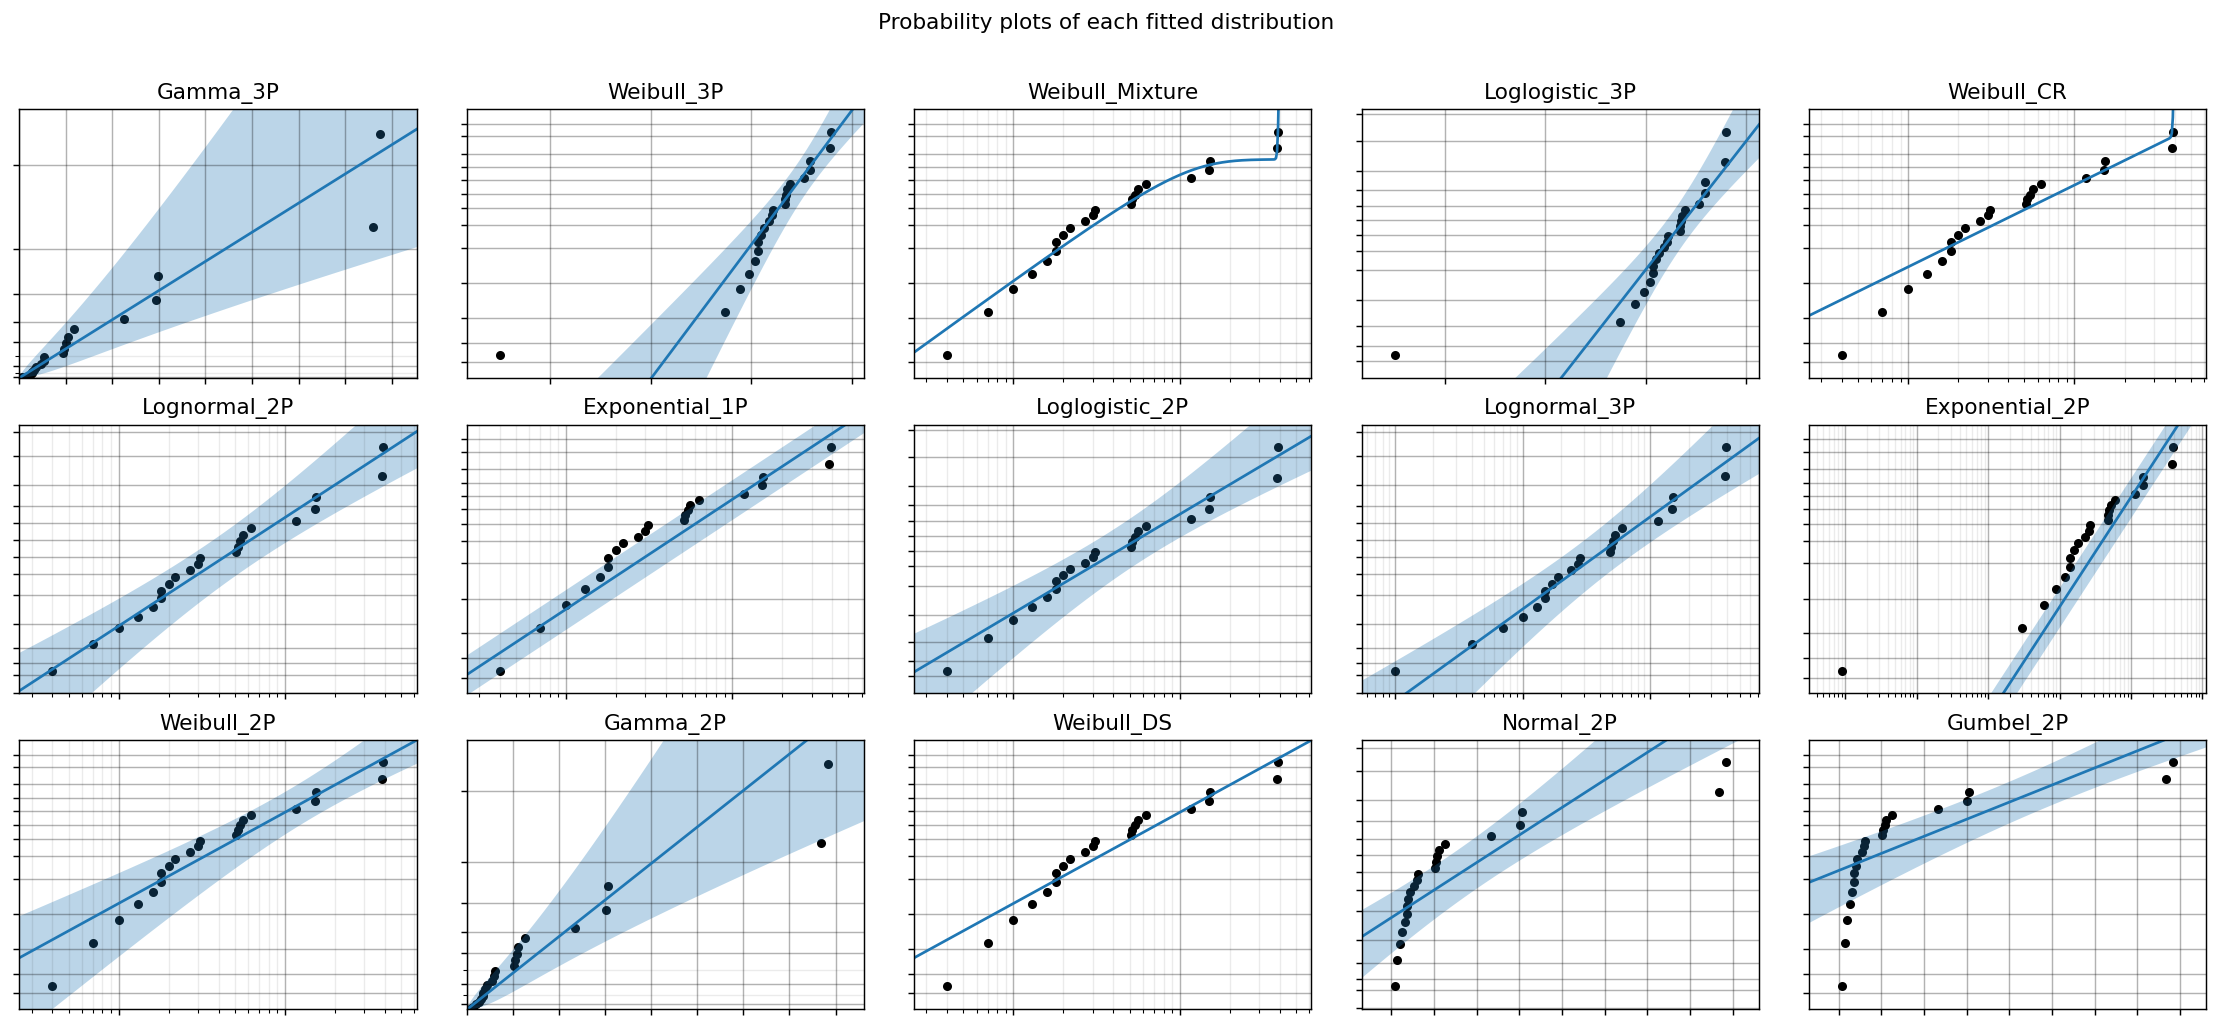

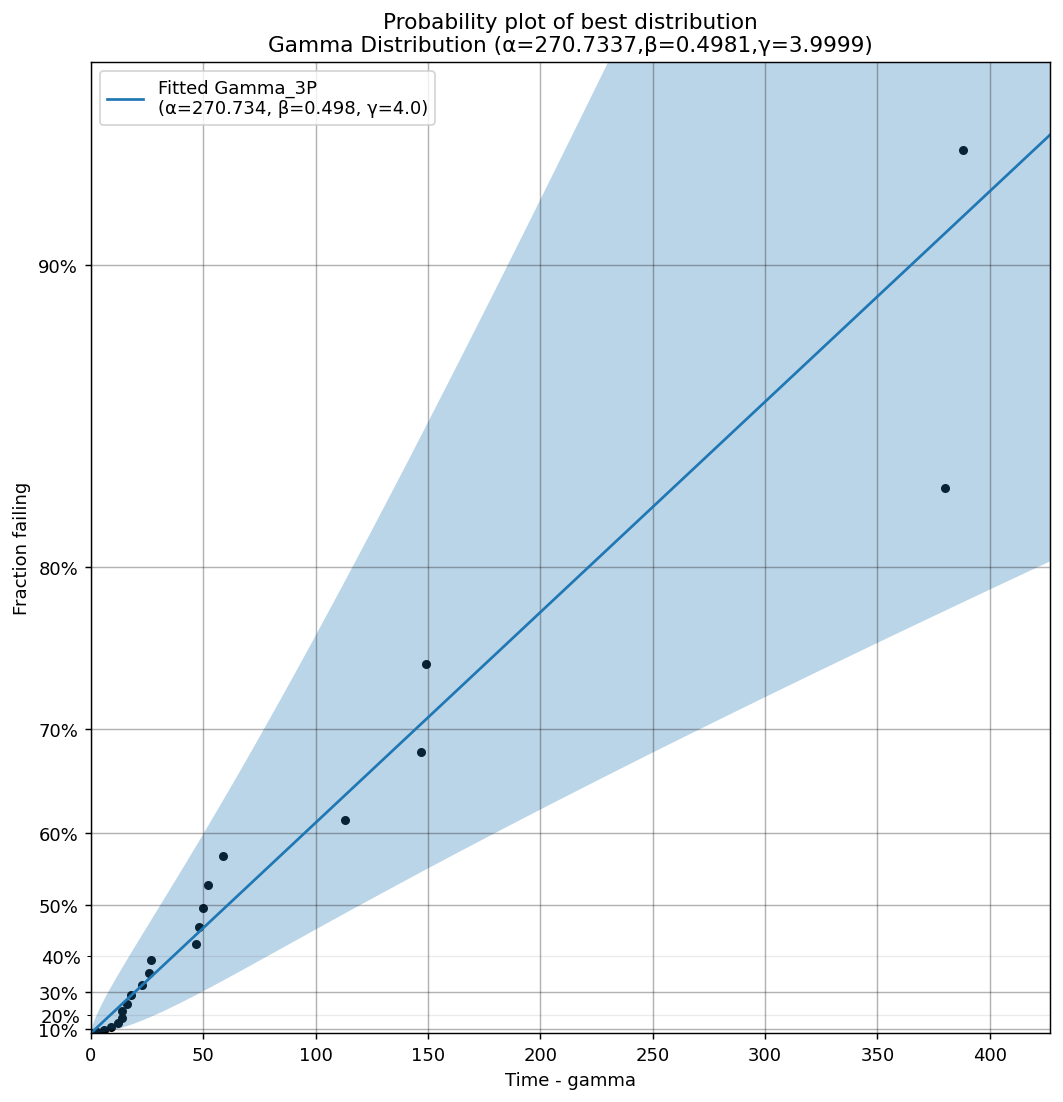

The best fitting distribution was Gamma_3P which had parameters [270.73371757   0.49805362   3.9999    ]


In [11]:
from reliability.Fitters import Fit_Everything
from reliability.Distributions import Weibull_Distribution
from reliability.Other_functions import make_right_censored_data

results_drug = Fit_Everything(failures=data_drug[data_drug['cens']==1].survt.values, right_censored=data_drug[data_drug['cens']==0].survt.values)
print('The best fitting distribution was', results_drug.best_distribution_name, 'which had parameters', results_drug.best_distribution.parameters)

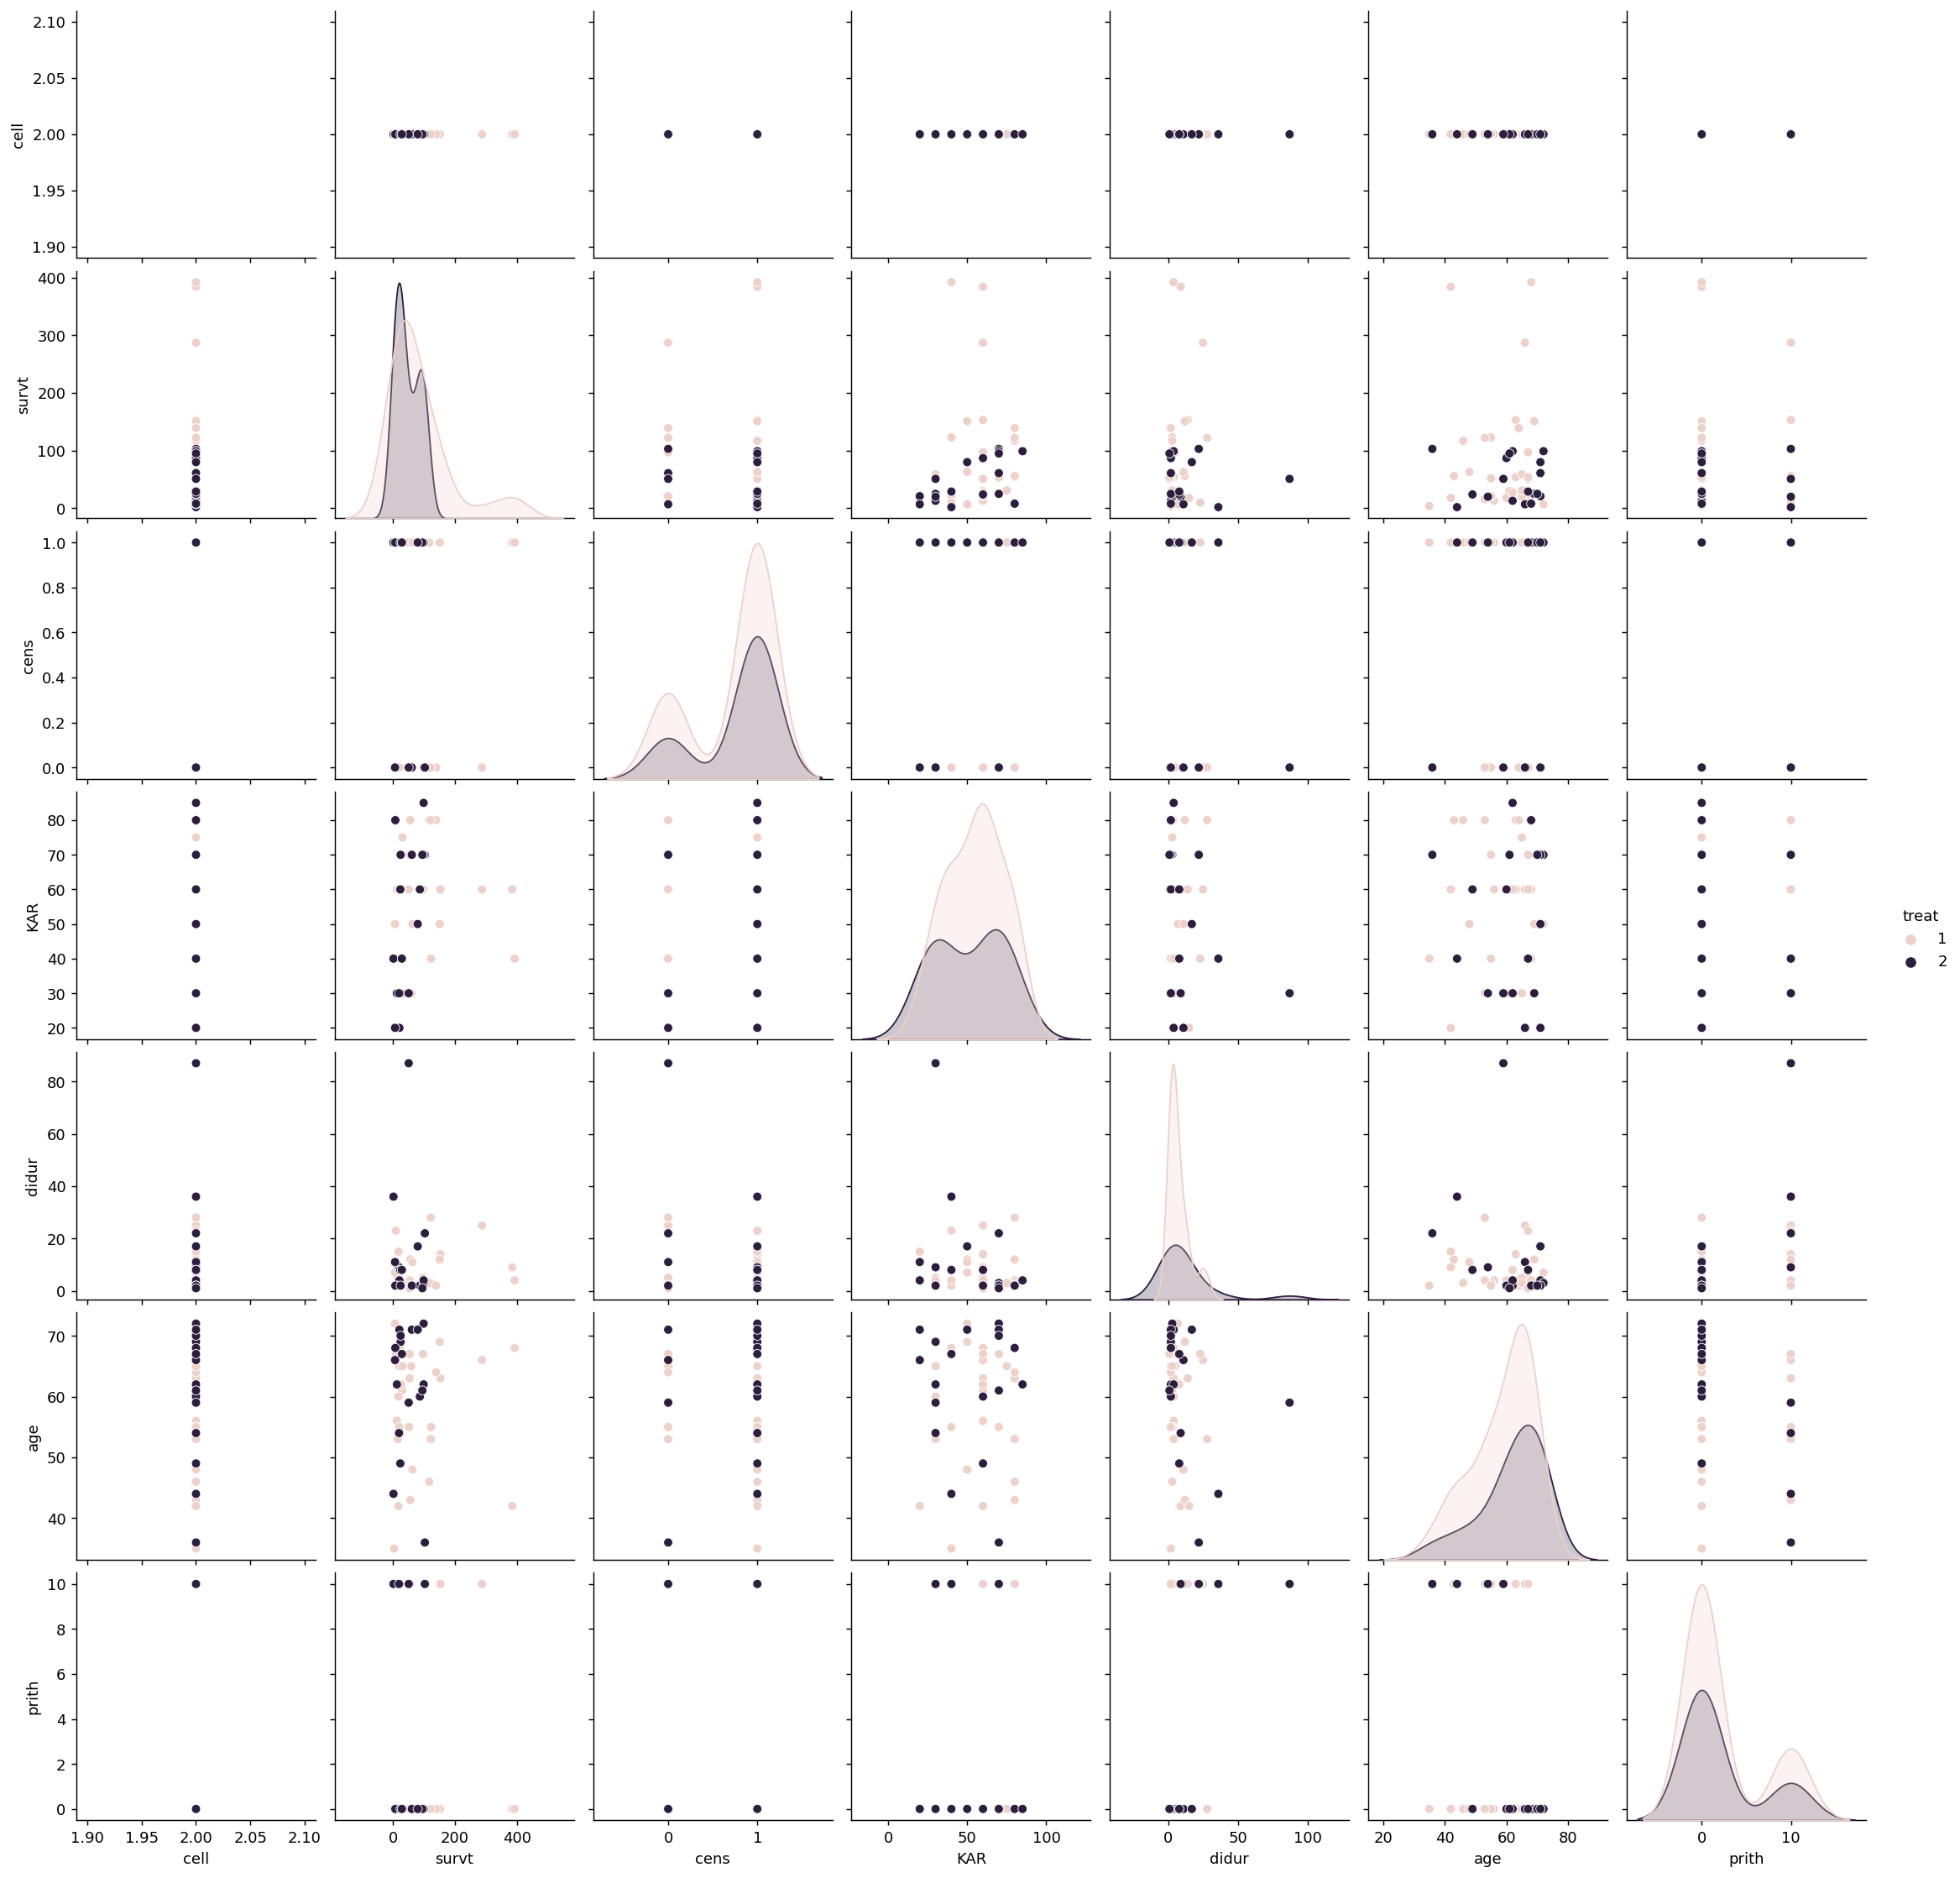

In [17]:
sbn.pairplot(data=data, hue='treat')
plt.show()